In [1]:
#source ./my_env_project/bin/activate
#sudo docker run -p 8888:8888 dolfinx/lab

import numpy as np
import Gradient_Descent 
import importlib



In [2]:
def f(x):
    return 10000*x[0]**2+x[1]**2
def df(x):
    return 2*x


def Rosenbock(x):
    return 100*(x[1]-x[0]**2)**2+(1-x[0])**2
def dRosenbock(x):
    return np.array([2*(200*x[0]**3-200*x[0]*x[1]+x[0]-1), 200*(x[1]-x[0]**2)])
def ddRosenbock(x):
    return np.array([[-400*(x[1]-x[0]**2)+800*x[0]**2+2, -400*x[0]], [-400*x[0], 200]])

In [25]:
importlib.reload(Gradient_Descent)

solver=Gradient_Descent.unconstrained_opt(Rosenbock,dRosenbock, optimizer="BFGS", maxiter=2000)
solver.solve(np.array([-1.2,1]))

Iteration: 0, Function value: 5.1011, Norm of the gradient: 43.898521
Iteration: 1, Function value: 3.2084, Norm of the gradient: 12.664248
Iteration: 2, Function value: 3.054, Norm of the gradient: 21.730899
Iteration: 3, Function value: 1.6918, Norm of the gradient: 10.338611
Iteration: 4, Function value: 1.6098, Norm of the gradient: 3.2582005
Iteration: 5, Function value: 1.4227, Norm of the gradient: 10.604787
Iteration: 6, Function value: 1.2897, Norm of the gradient: 2.8185214
Iteration: 7, Function value: 1.0611, Norm of the gradient: 8.8880211
Iteration: 8, Function value: 0.93269, Norm of the gradient: 2.2223733
Iteration: 9, Function value: 0.69203, Norm of the gradient: 5.5434904
Iteration: 10, Function value: 0.44557, Norm of the gradient: 12.532552
Iteration: 11, Function value: 0.23523, Norm of the gradient: 1.2718543
Iteration: 12, Function value: 0.1603, Norm of the gradient: 5.8393212
Iteration: 13, Function value: 0.13091, Norm of the gradient: 3.1689312
Iteration: 1

array([1., 1.])

In [5]:
solver=Gradient_Descent.unconstrained_opt(Rosenbock,dRosenbock, step_size_choice="powell")
solver.solve(np.array([-1.2,1]))

Iteration: 0, Function value: 24.2, Norm of the gradient: 232.86769
Iteration: 1, Function value: 5.1011, Norm of the gradient: 43.898521
Iteration: 2, Function value: 5.047, Norm of the gradient: 45.460144
Iteration: 3, Function value: 4.114, Norm of the gradient: 3.2789771
Iteration: 4, Function value: 4.1081, Norm of the gradient: 3.3509139
Iteration: 5, Function value: 4.1022, Norm of the gradient: 3.41296
Iteration: 6, Function value: 4.0961, Norm of the gradient: 3.4655605
Iteration: 7, Function value: 4.0901, Norm of the gradient: 3.5063758
Iteration: 8, Function value: 4.084, Norm of the gradient: 3.5357514
Iteration: 9, Function value: 4.0779, Norm of the gradient: 3.5522666
Iteration: 10, Function value: 4.0717, Norm of the gradient: 3.556104
Iteration: 11, Function value: 4.0655, Norm of the gradient: 3.5469351
Iteration: 12, Function value: 4.0592, Norm of the gradient: 3.524745
Iteration: 13, Function value: 4.0529, Norm of the gradient: 3.4903555
Iteration: 14, Function v

array([0.98545825, 0.97113527])

In [9]:
from  Taylor_Test import taylor_test

In [15]:
taylor_test(Rosenbock, dRosenbock, ddRosenbock, [-1,1],[1,1], order=2)

Running Taylor test
Computed residuals: [0.0005989999999997525, 7.493749999964994e-05, 9.371093749687039e-06, 1.171630859230421e-06]
Computed convergence rates: [2.9987962493807054, 2.9993985011622306, 2.999699344707088]


2.9993985011622306

In [1]:
import numpy as np
from Quadratic_solver import conjugate_gradient

In [2]:
def generateSPDmatrix(n):
    A = np.random.rand(n,n) 
    A = 0.5* (A+A.T)
    
    A = A + n*np.eye(n)
    return A

In [3]:
A=generateSPDmatrix(10)
np.linalg.eigh(A)

(array([ 9.1127281 ,  9.44505394,  9.8856127 ,  9.9091083 , 10.02402064,
        10.29080121, 10.52177918, 10.72481627, 11.2980999 , 14.9221678 ]),
 array([[ 1.33758473e-01,  2.12069239e-01,  3.22205125e-01,
          6.70242517e-03, -2.55247686e-01,  4.38228023e-01,
          4.84136913e-01, -3.72851561e-01,  2.88831719e-01,
         -3.45323706e-01],
        [ 6.46993806e-01,  1.60174409e-01, -3.95241336e-01,
          1.61360060e-01,  2.42200731e-01, -2.94179224e-01,
          3.10067293e-01,  5.54397382e-02, -1.55222885e-01,
         -3.24003621e-01],
        [-6.67753675e-01,  2.46116696e-01, -3.54642784e-01,
         -2.94373662e-01,  2.38331975e-01, -1.17006811e-01,
          3.50518375e-01, -3.44553299e-04, -2.20301170e-02,
         -2.95403019e-01],
        [-7.98073520e-02,  1.28881400e-01,  4.41451360e-01,
          1.64996805e-01,  4.78525650e-02, -5.21549001e-01,
         -1.11985036e-01,  3.31255575e-01,  4.98214624e-01,
         -3.31851139e-01],
        [ 5.82901716e-02

In [4]:
b=np.random.rand(10)
c=np.random.rand(1)

In [5]:
conjugate_gradient(A, b).solve(np.ones(10))


CG converged, Error 2.2594692e-14


array([ 0.03605602, -0.00173692,  0.05455931, -0.00969369,  0.05218529,
        0.06424705,  0.07824739,  0.06833318,  0.03063543,  0.01749625])

In [6]:
np.linalg.solve(A, b)

array([ 0.03605602, -0.00173692,  0.05455931, -0.00969369,  0.05218529,
        0.06424705,  0.07824739,  0.06833318,  0.03063543,  0.01749625])

In [5]:
importlib.reload(Gradient_Descent)

<module 'Gradient_Descent' from '/home/asdqwe123/Coding/optimization-tools/Gradient_Descent.py'>

In [6]:
solver=Gradient_Descent.unconstrained_opt(Rosenbock,dRosenbock, ddRosenbock, optimizer="Newton")
solver.solve(np.array([-1.2,1]))

Iteration: 0, Function value: 24.2, Norm of the gradient: 232.86769
Iteration: 1, Function value: 4.7319, Norm of the gradient: 4.6394262
Iteration: 2, Function value: 1.8134, Norm of the gradient: 66.584992
Iteration: 3, Function value: 0.02226, Norm of the gradient: 0.3127286
Iteration: 4, Function value: 0.0086723, Norm of the gradient: 2.7510182
Iteration: 5, Function value: 0.0017115, Norm of the gradient: 0.65985049
Iteration: 6, Function value: 0.00016068, Norm of the gradient: 0.45709671
Iteration: 7, Function value: 1.9266e-06, Norm of the gradient: 0.022363848
Iteration: 8, Function value: 4.2319e-10, Norm of the gradient: 0.00077978321
Iteration: 9, Function value: 1.7391e-17, Norm of the gradient: 6.7580158e-08
Iteration: 10, Function value: 8.288e-29, Norm of the gradient: 1.8207658e-14
Solver Converged!


array([1., 1.])

In [68]:
import numpy as np
import scipy
N=128
grid=np.linspace(0,1,128)

def c(x,y,l):
    return np.exp(-(x-y)**2/l)

def get_realisation(l):

    C=np.zeros((N,N))
    for i in range(N):
        for j in range(i,N):
            c_ij=c(grid[i],grid[j], l)
            C[i,j]=c_ij
            C[j,i]=c_ij
    w, v=np.linalg.eigh(C)
    v=v[:, w>0]
    w=w[w>0]
    V=v @ np.diag(np.sqrt(w))
    m=V.shape[1]
    xi=np.random.multivariate_normal(np.zeros(m), np.eye(m))
    Z=V@ xi
    xi=np.random.multivariate_normal(np.zeros(m), np.eye(m))
    Z2=V@ xi
    return Z, Z2


In [62]:
xi=np.random.multivariate_normal(np.zeros(m), np.eye(m))
Z=V@ xi

In [60]:
import matplotlib.pyplot as plt

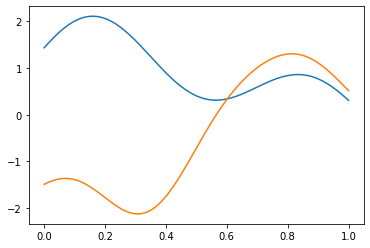

In [65]:
xi=np.random.multivariate_normal(np.zeros(m), np.eye(m))
Z=V@ xi
plt.plot(grid, Z)
xi=np.random.multivariate_normal(np.zeros(m), np.eye(m))
Z2=V@ xi
plt.plot(grid, Z2)

Text(0.5, 1.0, '$l=0.01$')

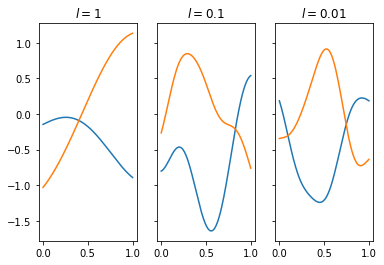

In [71]:
fig, axs = plt.subplots(1, 3, sharey=True)
Z, Z2= get_realisation(1)
axs[0].plot(grid, Z)
axs[0].plot(grid, Z2)
axs[ 0].set_title('$l=1$')
Z, Z2= get_realisation(0.1)
axs[ 1].plot(grid, Z)
axs[ 1].plot(grid, Z2)
axs[ 1].set_title('$l=0.1$')
Z, Z2= get_realisation(0.1)
axs[ 2].plot(grid, Z)
axs[ 2].plot(grid, Z2)
axs[ 2].set_title('$l=0.01$')


Problem 9

In [60]:
import scipy.linalg as lng
import math

P=50
N=128
h=1/N
x=np.linspace(0, 1, N).T
X=ml.repmat(x, 1, N)
Y=X.T
W=h*np.ones((N, 1))
W[0]=h/2
W[-1]=h/2

D=np.diag(np.sqrt(W))
C=np.minimum(X, Y)-np.multiply(X, Y)

Q=np.multiply(ml.repmat(np.sqrt(W.T), N, 1), ml.repmat(np.sqrt(W), 1, N))
A=np.multiply(C, Q)

EV, V=lng.eigh(A)

ev=np.sort(EV)
ind=np.argsort(EV)
V=V[:, ind]
V=scipy.linalg.solve(V, D)



#nu=1/math.pi**2*np.array([1/k**2 for k in range(1,P+1)])
#phi= np.sqrt(2)*np.array([math.sin(math.pi* k * x[k-1]) for k in range(1, P+1)])

ValueError: operands could not be broadcast together with shapes (16384,16384) (128,128) 

In [55]:
nu_hat

array([-4.13215606e-03,  0.00000000e+00,  1.74175642e-04,  1.74725676e-04,
        1.75647562e-04,  1.76949137e-04,  1.78641578e-04,  1.80739597e-04,
        1.83261724e-04,  1.86230658e-04,  1.89673714e-04,  1.93623373e-04,
        1.98117959e-04,  2.03202464e-04,  2.08929564e-04,  2.15360848e-04,
        2.22568328e-04,  2.30636293e-04,  2.39663593e-04,  2.49766462e-04,
        2.61082041e-04,  2.73772788e-04,  2.88032036e-04,  3.04091067e-04,
        3.22228167e-04,  3.42780343e-04,  3.66158612e-04,  3.92868166e-04,
        4.23535290e-04,  4.58943712e-04,  5.00084381e-04,  5.48224646e-04,
        6.05005987e-04,  6.72584568e-04,  7.53837506e-04,  8.52672412e-04,
        9.74503756e-04,  1.12700717e-03,  1.32135347e-03,  1.57430464e-03,
        1.91193380e-03,  2.37657884e-03,  3.04067860e-03,  4.03650221e-03,
        5.62654296e-03,  8.39285329e-03,  1.38442585e-02,  2.69466927e-02,
        7.25309422e-02,  4.74377762e-01])